In [1]:
import torch
print(f'PyTorch version in use: {torch.__version__}')

PyTorch version in use: 1.13.0


In [2]:
printer_1 = torch.cuda.is_available()
printer_2 = torch.cuda.device_count()
printer_3 = torch.cuda.get_device_name()

print(f'PyTorch Cuda Support available: {printer_1}')
print(f'Number of GPU devices avaiable: {printer_2}')
print(f'Device name: {printer_3}')

PyTorch Cuda Support available: True
Number of GPU devices avaiable: 1
Device name: NVIDIA GeForce GTX 1660 SUPER


### Section 1 : Basics

In [3]:
import numpy as np
np.set_printoptions(precision=3)

In [4]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

# Creating a tensor object from python list
t_a = torch.tensor(a)
# Creating a tensor object from a numpy ndarray object
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# Creating a tensor object with random values
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.2429, 0.4710, 0.3619],
        [0.7491, 0.8717, 0.0635]])


#### Section 1.1 : Manipulating data type of a Tensor

In [7]:
# Manipulating data type of a tensor
t_a_new = t_a.to(dtype=torch.int64)
print(t_a_new)
print(t_a_new.dtype)

tensor([1, 2, 3])
torch.int64


#### Section 1.2 : Manipulating dimensions of a Tensor

In [8]:
# Transpose
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0 ,1)
print(f'{t.shape} --> {t_tr.shape}')

torch.Size([3, 5]) --> torch.Size([5, 3])


In [9]:
# Reshape
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)

print(t)
print(t_reshape)

print(f'\nTensor of dimension {t.shape} reshaped to a tensor of dimension {t_reshape.shape}')

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

Tensor of dimension torch.Size([30]) reshaped to a tensor of dimension torch.Size([5, 6])


In [10]:
# Squeezing or removing unnecessary dimensions
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(f'{t.shape} --> {t_sqz.shape}')

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


#### Section 1.3 : Mathematical Operations on Tensors

In [11]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [12]:
# Element wise multiplication
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [13]:
# Mean, sum and standard deviation along a certain axis

# Computes the mean of each column of the tensor t1
print(t1)
t4 = torch.mean(t1, axis=0)
print(t4)
# Computes the sum of each row of the tensor t1
t5 = torch.sum(t1, axis=1)
print(t5)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([-0.1373,  0.2028])
tensor([ 0.0739,  0.2755, -0.3417,  0.3030,  0.0166])


In [14]:
t2_tr = torch.transpose(t2, 0, 1)
print(t1.shape)
print(t2.shape)
print(t2_tr.shape)

torch.Size([5, 2])
torch.Size([5, 2])
torch.Size([2, 5])


In [15]:
# Matrix Multiplication of a (5x2) and a (2x5) Tensor
t_out = torch.matmul(t1, t2_tr)
print(t_out)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [16]:
# Matrix Multiplication of a (2x5) and a (5x2) Tensor
t1_tr = torch.transpose(t1, 0, 1)
t_out = torch.matmul(t1_tr, t2)
print(t_out)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [17]:
# Computing L2 Norm of a Tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [18]:
# Manually verifying the Norm function
np.set_printoptions(precision=4)
n1 = t1.numpy()
out = np.sqrt(np.sum(np.square(n1), axis=1))
print(out)

[0.6785 0.5078 1.1162 0.5488 0.1853]


#### Section 1.4 : Split, Stack and Concatenate

In [19]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [20]:
t_splits = torch.chunk(t, 3)
print(t_splits)

(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))


In [21]:
for item in t_splits:
    print(item.numpy())

[0.7576 0.2793]
[0.4031 0.7347]
[0.0293 0.7999]


In [22]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [23]:
# Specifying the size of each split directly
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

[array([0.7576, 0.2793, 0.4031], dtype=float32),
 array([0.7347, 0.0293], dtype=float32)]

In [24]:
# Concatenating tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [25]:
# Stacking Tensors
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


### Section 2 : Building Input Pipelines

#### Section 2.1 : DataLoader Class

In [26]:
# Instantiating a dataloader class, which enables
# us to iterate through each of the samples in the dataset
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [27]:
# Defining the size of each batch using DataLoader
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader):
    print(f'Batch {i}: {batch}')

Batch 0: tensor([0., 1., 2.])
Batch 1: tensor([3., 4., 5.])


#### Section 2.2 : Combining Tensors into a Joint Dataset

In [28]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [29]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [30]:
joint_dataset = JointDataset(t_x, t_y)

for sample in joint_dataset:
    print(f'x:  {sample[0]}     y:  {sample[1]}')

x:  tensor([0.7576, 0.2793, 0.4031])     y:  0
x:  tensor([0.7347, 0.0293, 0.7999])     y:  1
x:  tensor([0.3971, 0.7544, 0.5695])     y:  2
x:  tensor([0.4388, 0.6387, 0.5247])     y:  3


#### Section 2.3 : Shuffle, Batch, Repeat

In [31]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

In [32]:
for i, batch in enumerate(data_loader, 1):
    print(f'Batch {i}: x: {batch[0]}\n         y: {batch[1]}')

Batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]])
         y: tensor([2, 0])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])
         y: tensor([1, 3])


#### Section 2.4 : Dataset From Local Storage

In [33]:
from pathlib import Path

imgdir_path = Path('cat_dog_images')
# Instantiate an iterator from the Path object that iterates over each file with the given extension
iterator = imgdir_path.glob('*.jpg')
file_list = sorted([str(path) for path in iterator])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


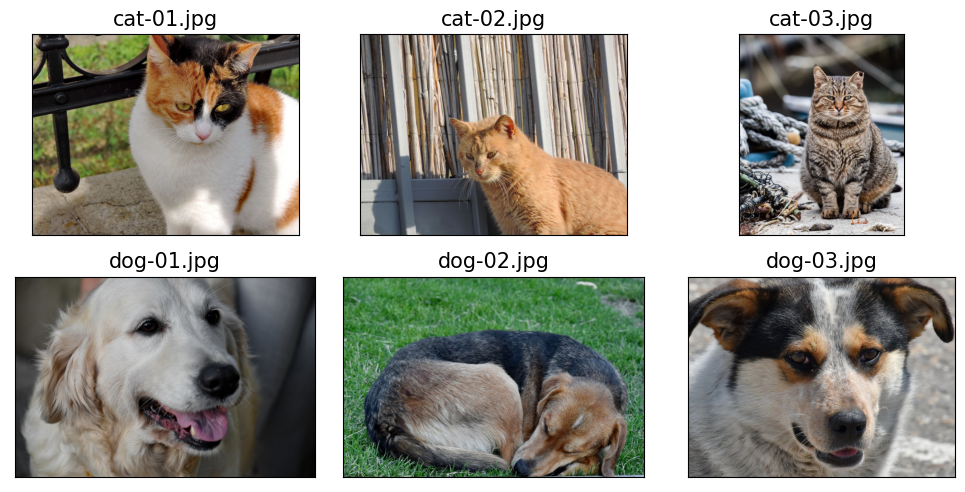

In [34]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for index, file in enumerate(file_list):
    img = Image.open(file)
    print(f'Image shape: {np.array(img).shape}')
    # Two rows and three columns
    ax = fig.add_subplot(2, 3, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.savefig('./Results/1_Cat_Dog_All.png')
plt.show()

In [35]:
# Labeling images (0 -> Cat, 1 -> Dog)
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
class ImageDatasetBase(Dataset):

    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
    
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

In [37]:
image_dataset = ImageDatasetBase(file_list=file_list, labels=labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [38]:
import torchvision.transforms as transforms

# Defining an image processing pipeline using Compose
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

In [39]:
class ImageDatasetTransform(Dataset):

    def __init__(self, file_list: list, labels: list, transform: transforms.Compose | None) -> None:
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index: int):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self) -> int:
        return len(self.labels)

In [40]:
image_dataset_transformed = ImageDatasetTransform(file_list=file_list, labels=labels, transform=transform)

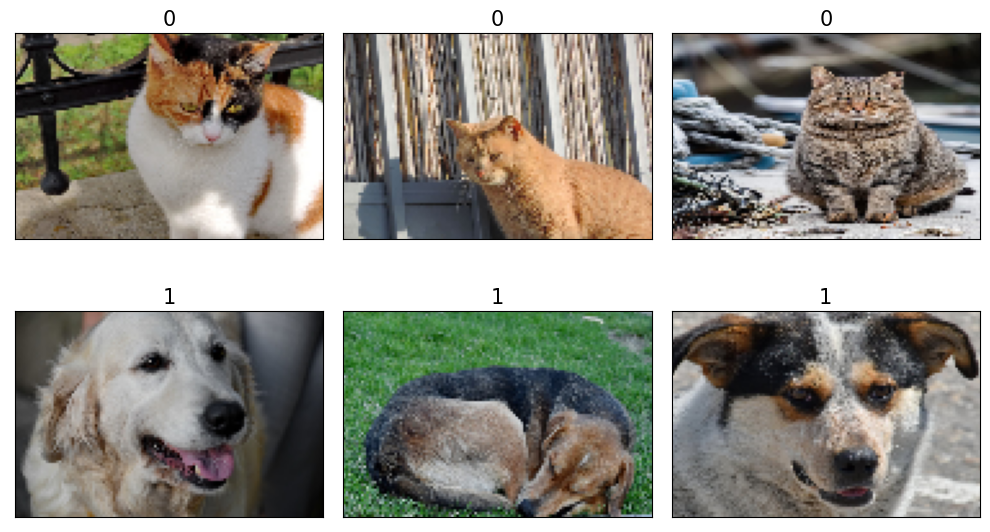

In [41]:
fig = plt.figure(figsize=(10, 6))
for index, sample in enumerate(image_dataset_transformed):
    ax = fig.add_subplot(2, 3, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(sample[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{sample[1]}', size=15)

plt.tight_layout()
plt.savefig('./Results/2_Processed_Image_Dataset.png')
plt.show()

#### Section 2.5 : The CelebA Dataset

In [42]:
# Moved to CelebA.py as a script due to large download size
# from torchvision import datasets

# image_path = './'
# celeba_dataset = datasets.CelebA(
#     image_path,
#     split='train',
#     target_type='attr',
#     download=True
# )

In [43]:
# Previous cell with download set to false
from torchvision import datasets

image_path = './'
celeba_dataset = datasets.CelebA(
    image_path,
    split='train',
    target_type='attr',
    download=False
)

In [45]:
print(isinstance(celeba_dataset, Dataset))

True


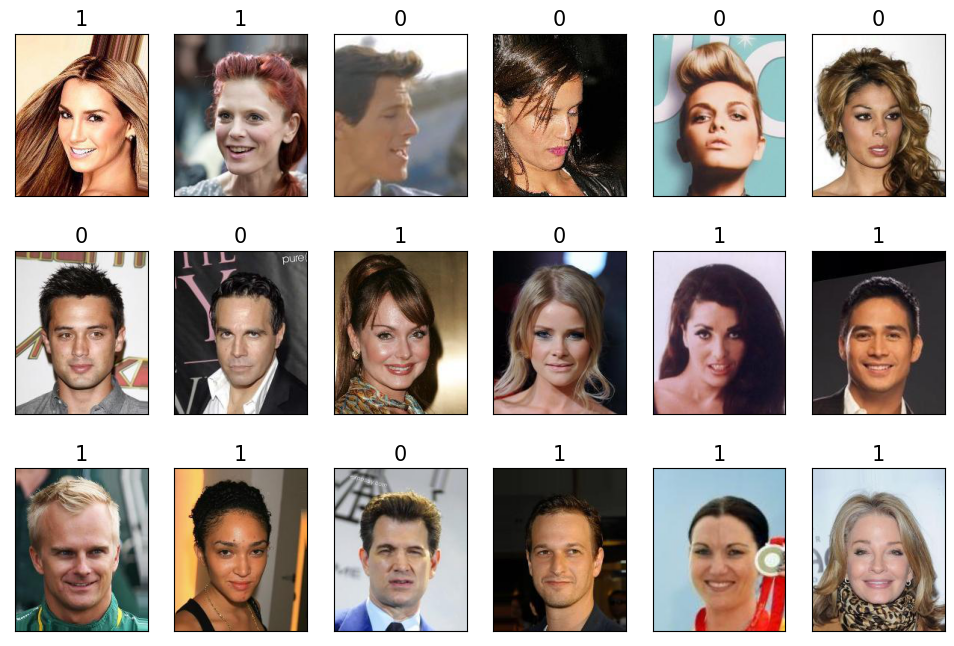

In [46]:
from itertools import islice

fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
plt.savefig('./Results/3_CelebA.png')
plt.show()

In [48]:
# Moved to MNIST.py as script due to download size
# MNIST dataset
# mnist_dataset = datasets.MNIST(
#     image_path,
#     'train',
#     download=True
# )
# print(isinstance(mnist_dataset, Dataset))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

True


#### Section 2.6 : The MNIST Dataset

In [50]:
# MNIST dataset with download set to false
mnist_dataset = datasets.MNIST(
    image_path,
    'train',
    download=False
)
print(isinstance(mnist_dataset, Dataset))

True


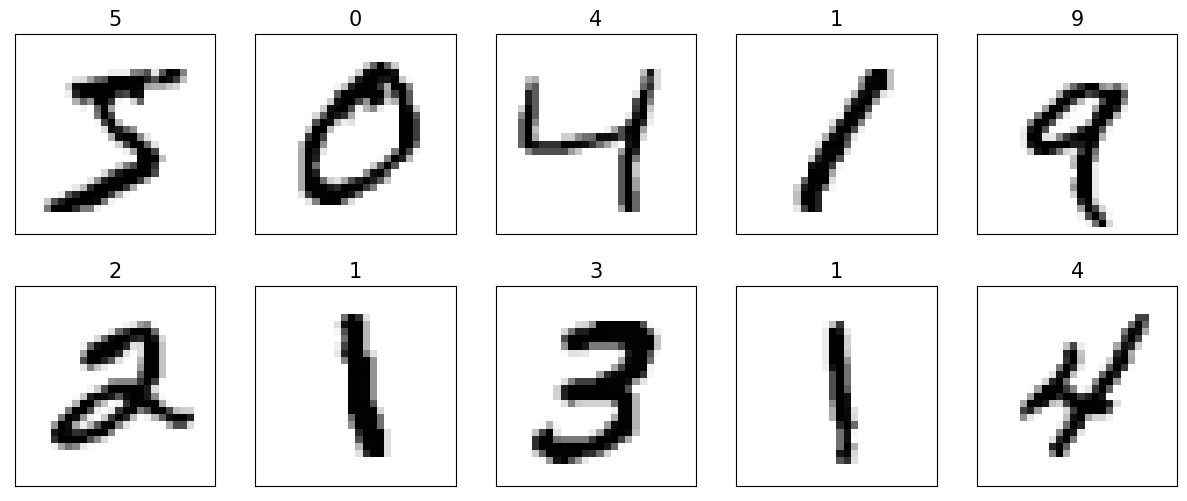

In [51]:
# Visualizing the MNIST Dataset 
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.savefig("./Results/4_MNIST_Dataset.png")
plt.show()